## Part 1: Importing data and preprocessing

In [6]:
#importing the packages and modules needed for the task
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

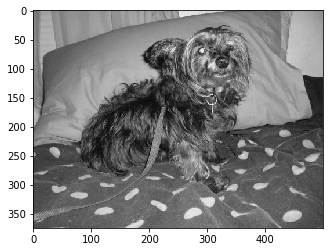

In [7]:
#Specifying the path of the dataset
DATADIR = "D:\Python\Codes\Deep Learning\Keras\PetImages"
CATEGORIES = ["Dog", "Cat"]

#Showing one image from the dataset
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

In [13]:
#showing the size of the image_array and the values
print(img_array.shape)
print(img_array)

(375, 500)
[[117 117 119 ... 133 132 132]
 [118 117 119 ... 135 134 134]
 [119 118 120 ... 137 136 136]
 ...
 [ 79  74  73 ...  80  76  73]
 [ 78  72  69 ...  72  73  74]
 [ 74  71  70 ...  75  73  71]]


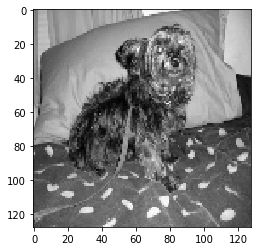

In [12]:
#Defining a concrete size for all the images
IMG_SIZE = 128

new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [14]:
#Creating the Training data from the dataset
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()

In [15]:
print(len(training_data))

24946


In [16]:
#Randomly shuffling the data
#So that cat and dog images are mixed together

import random
random.shuffle(training_data)

In [17]:
#Creating X (input) and y(output) set

X = []
y = []
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)


In [18]:
#Saving the X and y sets in form of pickles

import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

## Defining the Model and Training

In [2]:
#importing the packages and modules for the model

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
import pickle

In [3]:
#Loading the X and y
import pickle

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))


In [4]:
#Normalizing the pixel values of the image
X = X/255.0
print(X[1])

#Splitting the Dataset into Test and Train sets
X_test = X[-1000:]
y_test = y[-1000:]

X_train = X[:-1000]
y_train = y[:-1000]

[[[0.70196078]
  [0.71372549]
  [0.72156863]
  ...
  [0.6745098 ]
  [0.6745098 ]
  [0.6745098 ]]

 [[0.70196078]
  [0.71372549]
  [0.72156863]
  ...
  [0.66666667]
  [0.66666667]
  [0.66666667]]

 [[0.70196078]
  [0.70980392]
  [0.71764706]
  ...
  [0.6745098 ]
  [0.67058824]
  [0.67058824]]

 ...

 [[0.65882353]
  [0.65490196]
  [0.6627451 ]
  ...
  [0.59607843]
  [0.60392157]
  [0.61176471]]

 [[0.67058824]
  [0.66666667]
  [0.65882353]
  ...
  [0.61568627]
  [0.61568627]
  [0.61960784]]

 [[0.66666667]
  [0.66666667]
  [0.67058824]
  ...
  [0.63137255]
  [0.63137255]
  [0.64313725]]]


In [30]:
#Defining the structure and the parameters of the model

model = Sequential()

model.add(Conv2D(32, (3,3), strides=2, padding = 'valid', input_shape = X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.5))

model.add(Flatten())


model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy',
             optimizer=Adam(lr=0.00028),
             metrics=['accuracy'])

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 63, 63, 32)        320       
_________________________________________________________________
activation_31 (Activation)   (None, 63, 63, 32)        0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
activation_32 (Activation)   (None, 31, 31, 64)        0         
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 15, 15, 64)        0         
__________

In [32]:
#Training the model

model.fit(X_train,y_train,batch_size=32, epochs=25, validation_split=0.2)

Train on 19156 samples, validate on 4790 samples
Epoch 1/25
19156/19156 [==============================] - 43s 2ms/step - loss: 0.6759 - acc: 0.5633 - val_loss: 0.6375 - val_acc: 0.6384
Epoch 2/25
19156/19156 [==============================] - 42s 2ms/step - loss: 0.6008 - acc: 0.6758 - val_loss: 0.5391 - val_acc: 0.7322
Epoch 3/25
19156/19156 [==============================] - 43s 2ms/step - loss: 0.5354 - acc: 0.7304 - val_loss: 0.4988 - val_acc: 0.7699
Epoch 4/25
19156/19156 [==============================] - 42s 2ms/step - loss: 0.5018 - acc: 0.7538 - val_loss: 0.4728 - val_acc: 0.7806
Epoch 5/25
19156/19156 [==============================] - 43s 2ms/step - loss: 0.4742 - acc: 0.7703 - val_loss: 0.4435 - val_acc: 0.7981
Epoch 6/25
19156/19156 [==============================] - 44s 2ms/step - loss: 0.4473 - acc: 0.7899 - val_loss: 0.4143 - val_acc: 0.8171
Epoch 7/25
19156/19156 [==============================] - 43s 2ms/step - loss: 0.4185 - acc: 0.8046 - val_loss: 0.3871 - val_acc:

In [33]:
model.evaluate(X_test,y_test)

1000/1000 [==============================] - 1s 993us/step


[0.22358268898725508, 0.901]

In [34]:
model.save('CvsD-90.h5')

## Testing the model with new images

In [13]:
#Importing the packages and modules required for the task

import cv2
import keras
import matplotlib.pyplot as plt

In [21]:
#Defining Helper functions to make our task easy

CATEGORIES = ["Dog", "Cat"]

#Prepare function to compress the image to given size and convert it to grayscale
def prepare(filepath):
    IMG_SIZE = 128
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1,IMG_SIZE, IMG_SIZE, 1)

#Getting the name of the pet from the output of the model
def name(pred):
    return CATEGORIES[int(pred[0][0])]

#To show the image from a given location
def plot_img(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    plt.imshow(img_array)
    plt.show()

In [10]:
#Loading the model from the local file

model = keras.models.load_model("CvsD-90.h5")

In [36]:
#Predicting whether its a Dog or a Cat in the given image

filePath = './PetImages/Test/cat7.jpg'
pred = model.predict([prepare(filePath)])
print(name(pred))

Cat


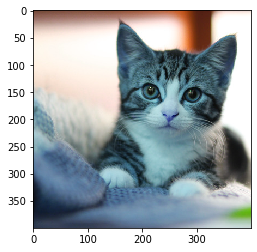

In [37]:
plot_img(filePath)